In [1]:
import matplotlib.pyplot as plt

## 作圖風格

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


## 使用 ggplot 風格

In [3]:
plt.style.use('ggplot')

##  %matplotlin inline lead to static images embeded in the notebook

In [4]:
%matplotlib inline

## 更改全部中文字體

## 中文字體: DFKai-SB(win10), Microsoft YaHei (Win7) 
##  Microsoft MHei(Windows), SimHei (Mac) 

In [5]:
plt.rcParams['font.family']='DFKai-SB'

## Project example :
## 新竹市不動產實價登錄資訊-買賣案件
## https://data.gov.tw/dataset/67502
## 鄉鎮市區、交易標的、土地區段位置/建物區段門牌、土地移轉總面積[平方公尺]、使用分區或編定、非都市土地使用分區、非都市土地使用地、交易年月、交易筆棟數、移轉層次、總樓層數、建物型態、主要用途、主要建材、建築完成年月、建物移轉總面積[平方公尺]、現況格局-房、現況格局-廳、現況格局-衛、現況格局-隔間、有無管理組織、總價[元]、單價[元/平方公尺]、車位...¶

In [6]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv("hsin.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 27 columns):
P1LA_CF46         42881 non-null object
P1MA_CASEFLAG     43456 non-null object
P1MA_DD09         43456 non-null object
P1LA_CArea        43456 non-null float64
P1LA_C11_1        37214 non-null object
P1LA_C12_1        5986 non-null object
P1LA_C12_2        5794 non-null object
(沒有資料行名稱)         43456 non-null int64
(沒有資料行名稱)1        43456 non-null object
P1JD_14_1         36516 non-null object
P1LA_F13          37664 non-null object
P1MA_BUILD5       43456 non-null object
P1LA_F11          37566 non-null object
P1LA_F12          37659 non-null object
(沒有資料行名稱)2        35754 non-null float64
P1LA_FArea        43456 non-null float64
P1MA_BUILD1       35252 non-null object
P1MA_BUILD2       34042 non-null object
P1MA_BUILD3       35494 non-null object
P1MA_BUILD4       43456 non-null object
P1MA_MANAGE       43456 non-null object
P1MA_TOTPRICE     43456 non-null int64
MeanPrice   

## 參考 FGU-Class/Lecture_0509.ipynb
## 看一下 first five rows

In [9]:
df[:5]

,P1LA_CF46,P1MA_CASEFLAG,P1MA_DD09,P1LA_CArea,P1LA_C11_1,P1LA_C12_1,P1LA_C12_2,(沒有資料行名稱),(沒有資料行名稱)1,P1JD_14_1,...,P1MA_BUILD2,P1MA_BUILD3,P1MA_BUILD4,P1MA_MANAGE,P1MA_TOTPRICE,MeanPrice,P1PA_PARK_1,P1PA_PARKAREA,P1PA_PARKPRICE,P1MA_NOTE
0,香山區,地+建,牛埔北路１９６巷1～30號,351.436,NaN,鄉村區,乙建351.436,10107,土地2建物1,A一層=49.29，二層=65.57,...,1廳,1衛,有隔間,無管理組織,8500000,244638,NaN,0.00,0,權利人有二人
1,東區,地+建,建功一路５３巷1～30號,22.200,住22.2,NaN,NaN,10106,土地1建物1,A三層=75.90,...,2廳,1衛,有隔間,無管理組織,5408000,235543,NaN,0.00,0,無
2,東區,土地,前溪段151～180地號,769.753,農769.753,特定農業區,NaN,10107,土地1,NaN,...,NaN,NaN,有隔間,無管理組織,13770000,59137,NaN,0.00,0,無
3,東區,地+建+車,中央路２４５巷31～60號,9.485,住9.485,NaN,NaN,10106,土地1建物1車位1,A四層=40.07,...,1廳,1衛,有隔間,有管理組織,6900000,260953,坡道平面,34.81,1450000,無
4,香山區,地+建,至善街３１巷1～30號,14.698,NaN,山坡地保育區,丙建14.698,10107,土地2建物1,A四層=17.00,...,NaN,1衛,有隔間,有管理組織,520000,60545,NaN,0.00,0,無


## 用 df.loc  看一下 其他 columns

In [10]:
df.loc[:5,"(沒有資料行名稱)":"P1MA_BUILD2"]

,(沒有資料行名稱),(沒有資料行名稱)1,P1JD_14_1,P1LA_F13,P1MA_BUILD5,P1LA_F11,P1LA_F12,(沒有資料行名稱)2,P1LA_FArea,P1MA_BUILD1,P1MA_BUILD2
0,10107,土地2建物1,A一層=49.29，二層=65.57,2層,透天厝,住家用,加強磚造,7209.0,114.860,3房,1廳
1,10106,土地1建物1,A三層=75.90,3層,公寓,國民住宅,鋼筋混凝土造,NaN,75.900,3房,2廳
2,10107,土地1,NaN,NaN,土地,NaN,NaN,NaN,0.000,NaN,NaN
3,10106,土地1建物1車位1,A四層=40.07,11層,套房,見其他登記事項，共同使用部份,鋼筋混凝土造,10102.0,103.851,1房,1廳
4,10107,土地2建物1,A四層=17.00,10層,套房,住家用，見其他登記事項,鋼筋混凝土造,8705.0,28.392,1房,NaN
5,10106,土地1建物1,A一層=55.20，二層=55.20,2層,透天厝,住家用,加強磚造,7106.0,110.400,4房,2廳


## 取有興趣的欄位

In [11]:
dfmo=df[["P1LA_CF46","(沒有資料行名稱)2","P1LA_FArea","P1MA_BUILD1","P1MA_BUILD2","P1MA_BUILD3","P1MA_TOTPRICE","P1MA_BUILD5" ]]

In [12]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
P1LA_CF46        42881 non-null object
(沒有資料行名稱)2       35754 non-null float64
P1LA_FArea       43456 non-null float64
P1MA_BUILD1      35252 non-null object
P1MA_BUILD2      34042 non-null object
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
P1MA_BUILD5      43456 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.7+ MB


In [13]:
dfmo[:5]

,P1LA_CF46,(沒有資料行名稱)2,P1LA_FArea,P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,P1MA_BUILD5
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房


## 用 value_counts() 去看有哪些,及有多少個.

In [14]:
dfmo["P1LA_CF46"].value_counts()

東區     23329
北區     12013
香山區     7539
Name: P1LA_CF46, dtype: int64

In [15]:
23329+12013+7539

42881

In [16]:
dfmo["P1MA_BUILD5"].value_counts()

住宅大樓      17158
透天厝        6448
華廈         6065
土地         5776
套房         3340
公寓         2551
店面          747
車位          624
辦公商業大樓      519
其他           70
廠辦           63
工廠           57
農舍           37
倉庫            1
Name: P1MA_BUILD5, dtype: int64

## 修改欄位名稱

In [19]:
dfmo=dfmo.rename(columns={'P1LA_CF46':'鄉鎮市區', 
                          '(沒有資料行名稱)2':'建築完成年月',
                          'P1LA_FArea':'建物移轉總面積[平方公尺]',
                           "P1MA_BUILD5":'建物型態'})
dfmo[:6]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房
5,東區,7106.0,110.400,4房,2廳,1衛,5428000,透天厝


## 其中 有欄位資料 Nan !!  missing value, 空資料 !!
## missing data is  Nan , type(Nan) is float 
## 用 series.isnull 找遺失值
## review df.loc, df.iloc 用法

In [25]:
data_room=dfmo['鄉鎮市區']
ck=data_room.isnull()
cnt=0
row=0
location=[]# 找出 Nan 在哪一筆資料
for item in ck:
    if item:
        cnt=cnt+1
        location.append(row)
    row=row+1
print("共有 NaN:",cnt)
#print("Nan 位置在:",location)
#dfmo['鄉鎮市區'][60:70]

共有 NaN: 575


In [19]:
print(dfmo.loc[2,"P1MA_BUILD1"])
type(dfmo.loc[2,"P1MA_BUILD1"])

nan


float

In [20]:
print(dfmo.iloc[2,3])
type(dfmo.iloc[2,3])

nan


float

In [21]:
dfmo.iloc[2,3]  is    dfmo.loc[2,"P1MA_BUILD1"]

True

In [26]:
data_room=dfmo['P1MA_BUILD1']
ck=data_room.isnull()
cnt=0
row=0
location=[]# 找出 Nan 在哪一筆資料
for item in ck:
    if item:
        cnt=cnt+1
        location.append(row)
    row=row+1
print("共有 NaN:",cnt)
#print("Nan 位置在:",location)
#dfmo['鄉鎮市區'][60:70]

共有 NaN: 8204


## 有 data,  其type 為 str.   若無data, missing value :Nan,  type 為 float 
## 看一下 row index=5 , 欄位:"P1MA_BUILD1"  

In [27]:
print(dfmo.loc[5,"P1MA_BUILD1"])
type(dfmo.loc[5,"P1MA_BUILD1"])

4房


str

## 如何 將  string:'4房' 中 的 4 取出 轉為 int 呢?

In [28]:
dfmo.loc[5,"P1MA_BUILD1"][0:-1]

'4'

In [29]:
int(dfmo.loc[5,"P1MA_BUILD1"][0:-1])

4

In [30]:
## review string sliceing 

In [31]:
a='3erq房'

In [32]:
a=a[0:-1]

In [33]:
a

'3erq'

In [34]:
len(dfmo['P1MA_BUILD1'])

43456

In [35]:
total_num_row=len(dfmo['P1MA_BUILD1'])
total_num_row

43456

In [36]:
count=0
t_room=[] # 空 list 
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD1"],str):# 如果 為 str 即有真正資料
        t_room.append( int(dfmo.loc[i,"P1MA_BUILD1"][0:-1]) ) # list 加元素: append 參考 FGU-Class/Lecture_0418.ipyn 
        count=count+1
    else:# 為 Nan 
        t_room.append( 0 )
print("The  P1MA_BUILD1 column has  ",count, " 筆資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD1 column has   35252  筆資料 and has  8204 NaN(空資料)
total data: 43456


In [37]:
t_room[:10]

[3, 3, 0, 1, 1, 4, 1, 1, 1, 4]

In [38]:
len(t_room)

43456

## 參考 FGU-Class/Lecture_0509.ipynb
## add a column

In [39]:
dfmo['現況格局-房']=t_room

In [42]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD1,P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房
0,香山區,7209.0,114.860,3房,1廳,1衛,8500000,透天厝,3
1,東區,NaN,75.900,3房,2廳,1衛,5408000,公寓,3
2,東區,NaN,0.000,NaN,NaN,NaN,13770000,土地,0
3,東區,10102.0,103.851,1房,1廳,1衛,6900000,套房,1
4,香山區,8705.0,28.392,1房,NaN,1衛,520000,套房,1


In [43]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 9 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_BUILD1      35252 non-null object
P1MA_BUILD2      34042 non-null object
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.0+ MB


## 比較 現況格局- 房 與 P1MA_BUILD1 欄位 : 是 否轉成 int 成功 ?
## 刪除 P1MA_BUILD1 欄位 

In [44]:
dfmo=dfmo.drop('P1MA_BUILD1',axis=1)

In [45]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房
0,香山區,7209.0,114.860,1廳,1衛,8500000,透天厝,3
1,東區,NaN,75.900,2廳,1衛,5408000,公寓,3
2,東區,NaN,0.000,NaN,NaN,13770000,土地,0
3,東區,10102.0,103.851,1廳,1衛,6900000,套房,1
4,香山區,8705.0,28.392,NaN,1衛,520000,套房,1
5,東區,7106.0,110.400,2廳,1衛,5428000,透天厝,4
6,東區,10102.0,65.804,1廳,1衛,5300000,套房,1
7,東區,10102.0,65.804,1廳,1衛,5630000,套房,1
8,東區,10102.0,88.335,1廳,1衛,6550000,套房,1
9,東區,5912.0,72.000,1廳,2衛,5100000,透天厝,4


## 換轉 P1MA_BUILD2 ( 現況格局-廳  ) 成為 int  

In [46]:
total_num_row=len(dfmo['P1MA_BUILD2'])
total_num_row

43456

In [48]:
count=0
t_living_room=[]
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD2"],str):# 如果 為 str 即有真正資料
        t_living_room.append( int(dfmo.loc[i,"P1MA_BUILD2"][0:-1]) )
        count=count+1
    else:# 為 Nan 
        t_living_room.append( 0 )
print("The  P1MA_BUILD2  column has  ",count, " 筆資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD2  column has   34042  筆資料 and has  9414 NaN(空資料)
total data: 43456


In [49]:
t_living_room[:10]

[1, 2, 0, 1, 0, 2, 1, 1, 1, 1]

In [50]:
len(t_living_room)

43456

In [51]:
dfmo['現況格局-廳']=t_living_room

In [52]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD2,P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳
0,香山區,7209.0,114.860,1廳,1衛,8500000,透天厝,3,1
1,東區,NaN,75.900,2廳,1衛,5408000,公寓,3,2
2,東區,NaN,0.000,NaN,NaN,13770000,土地,0,0
3,東區,10102.0,103.851,1廳,1衛,6900000,套房,1,1
4,香山區,8705.0,28.392,NaN,1衛,520000,套房,1,0
5,東區,7106.0,110.400,2廳,1衛,5428000,透天厝,4,2
6,東區,10102.0,65.804,1廳,1衛,5300000,套房,1,1
7,東區,10102.0,65.804,1廳,1衛,5630000,套房,1,1
8,東區,10102.0,88.335,1廳,1衛,6550000,套房,1,1
9,東區,5912.0,72.000,1廳,2衛,5100000,透天厝,4,1


In [53]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 9 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_BUILD2      34042 non-null object
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB


In [54]:
dfmo=dfmo.drop('P1MA_BUILD2',axis=1)

In [55]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳
0,香山區,7209.0,114.860,1衛,8500000,透天厝,3,1
1,東區,NaN,75.900,1衛,5408000,公寓,3,2
2,東區,NaN,0.000,NaN,13770000,土地,0,0
3,東區,10102.0,103.851,1衛,6900000,套房,1,1
4,香山區,8705.0,28.392,1衛,520000,套房,1,0


## 換轉 P1MA_BUILD3 ( 現況格局-衛) 成為 int

In [56]:
total_num_row=len(dfmo['P1MA_BUILD3'])
total_num_row

43456

In [57]:
count=0
t_bath_room=[]
for i in range(total_num_row):
    if isinstance(dfmo.loc[i,"P1MA_BUILD3"],str):# 如果 為 str 即有真正資料
        t_bath_room.append( int(dfmo.loc[i,"P1MA_BUILD3"][0:-1]) )
        count=count+1
    else:# 為 Nan 
        t_bath_room.append( 0 )
print("The  P1MA_BUILD3  column has  ",count, " 筆資料", "and has ", total_num_row-count,"NaN(空資料)")
print("total data:",total_num_row )

The  P1MA_BUILD3  column has   35494  筆資料 and has  7962 NaN(空資料)
total data: 43456


In [58]:
print( t_bath_room[:10] ) 
print(len(t_bath_room) )
dfmo['現況格局-衛']=t_bath_room

[1, 1, 0, 1, 1, 1, 1, 1, 1, 2]
43456


In [59]:
dfmo[:10]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_BUILD3,P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,1衛,8500000,透天厝,3,1,1
1,東區,NaN,75.900,1衛,5408000,公寓,3,2,1
2,東區,NaN,0.000,NaN,13770000,土地,0,0,0
3,東區,10102.0,103.851,1衛,6900000,套房,1,1,1
4,香山區,8705.0,28.392,1衛,520000,套房,1,0,1
5,東區,7106.0,110.400,1衛,5428000,透天厝,4,2,1
6,東區,10102.0,65.804,1衛,5300000,套房,1,1,1
7,東區,10102.0,65.804,1衛,5630000,套房,1,1,1
8,東區,10102.0,88.335,1衛,6550000,套房,1,1,1
9,東區,5912.0,72.000,2衛,5100000,透天厝,4,1,2


In [60]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 9 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_BUILD3      35494 non-null object
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [61]:
dfmo=dfmo.drop('P1MA_BUILD3',axis=1)

In [62]:
dfmo[:5]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],P1MA_TOTPRICE,建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1
1,東區,NaN,75.900,5408000,公寓,3,2,1
2,東區,NaN,0.000,13770000,土地,0,0,0
3,東區,10102.0,103.851,6900000,套房,1,1,1
4,香山區,8705.0,28.392,520000,套房,1,0,1


In [63]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
P1MA_TOTPRICE    43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


## 修改欄位名稱

In [64]:
dfmo=dfmo.rename(      columns={  'P1MA_TOTPRICE'  :  '總價[元]'  }     )
dfmo[:100]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1
1,東區,NaN,75.900,5408000,公寓,3,2,1
2,東區,NaN,0.000,13770000,土地,0,0,0
3,東區,10102.0,103.851,6900000,套房,1,1,1
4,香山區,8705.0,28.392,520000,套房,1,0,1
5,東區,7106.0,110.400,5428000,透天厝,4,2,1
6,東區,10102.0,65.804,5300000,套房,1,1,1
7,東區,10102.0,65.804,5630000,套房,1,1,1
8,東區,10102.0,88.335,6550000,套房,1,1,1
9,東區,5912.0,72.000,5100000,透天厝,4,1,2


In [65]:
dfmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 8 columns):
鄉鎮市區             42881 non-null object
建築完成年月           35754 non-null float64
建物移轉總面積[平方公尺]    43456 non-null float64
總價[元]            43456 non-null int64
建物型態             43456 non-null object
現況格局-房           43456 non-null int64
現況格局-廳           43456 non-null int64
現況格局-衛           43456 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


In [67]:
dfmo.describe()

,建築完成年月,建物移轉總面積[平方公尺],總價[元],現況格局-房,現況格局-廳,現況格局-衛
count,35754.000000,43456.000000,4.345600e+04,43456.00000,43456.000000,43456.000000
mean,9434.007244,153.013497,1.095019e+07,2.65121,1.471488,1.848237
std,1145.957581,549.742850,2.901826e+07,2.26749,0.966171,2.014332
min,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,8605.000000,72.120000,4.250000e+06,1.00000,1.000000,1.000000
50%,9908.000000,140.680000,7.750000e+06,3.00000,2.000000,2.000000
75%,10305.000000,196.956000,1.306000e+07,4.00000,2.000000,2.000000
max,77101.000000,70414.550000,3.310000e+09,88.00000,58.000000,88.000000


In [68]:
dfmo["總價[百萬元]"]=dfmo["總價[元]"]/1000000

In [69]:
dfmo[:15]

,鄉鎮市區,建築完成年月,建物移轉總面積[平方公尺],總價[元],建物型態,現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
0,香山區,7209.0,114.860,8500000,透天厝,3,1,1,8.500
1,東區,NaN,75.900,5408000,公寓,3,2,1,5.408
2,東區,NaN,0.000,13770000,土地,0,0,0,13.770
3,東區,10102.0,103.851,6900000,套房,1,1,1,6.900
4,香山區,8705.0,28.392,520000,套房,1,0,1,0.520
5,東區,7106.0,110.400,5428000,透天厝,4,2,1,5.428
6,東區,10102.0,65.804,5300000,套房,1,1,1,5.300
7,東區,10102.0,65.804,5630000,套房,1,1,1,5.630
8,東區,10102.0,88.335,6550000,套房,1,1,1,6.550
9,東區,5912.0,72.000,5100000,透天厝,4,1,2,5.100


In [70]:
dfmo.describe()

,建築完成年月,建物移轉總面積[平方公尺],總價[元],現況格局-房,現況格局-廳,現況格局-衛,總價[百萬元]
count,35754.000000,43456.000000,4.345600e+04,43456.00000,43456.000000,43456.000000,43456.000000
mean,9434.007244,153.013497,1.095019e+07,2.65121,1.471488,1.848237,10.950189
std,1145.957581,549.742850,2.901826e+07,2.26749,0.966171,2.014332,29.018261
min,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,8605.000000,72.120000,4.250000e+06,1.00000,1.000000,1.000000,4.250000
50%,9908.000000,140.680000,7.750000e+06,3.00000,2.000000,2.000000,7.750000
75%,10305.000000,196.956000,1.306000e+07,4.00000,2.000000,2.000000,13.060000
max,77101.000000,70414.550000,3.310000e+09,88.00000,58.000000,88.000000,3310.000000


## 用 histogram to get a feel of the data !! 

In [71]:
bins=np.linspace(0, 900, num=100)

(0, 2000)

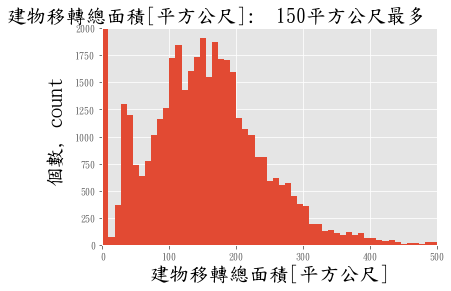

In [72]:
plt.hist(dfmo['建物移轉總面積[平方公尺]'],bins)

plt.title("建物移轉總面積[平方公尺]:  150平方公尺最多 ",color='black',loc='right',size=20)
plt.xlabel('建物移轉總面積[平方公尺]',size=20,color='black')
plt.ylabel('個數, count',color='black',size=20)
plt.xlim(0,500)
plt.ylim(0,2000)

(0, 10)

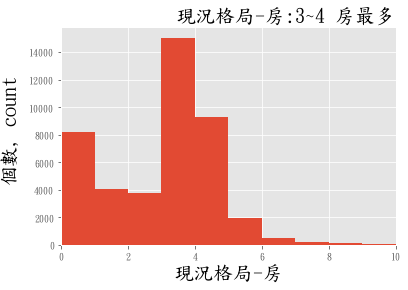

In [73]:
plt.hist(dfmo['現況格局-房'],bins=list(range(90)))

plt.title("現況格局-房:3~4 房最多",color='black',loc='right',size=20)
plt.xlabel('現況格局-房',size=20,color='black')
plt.ylabel('個數, count',color='black',size=20)
plt.xlim(0,10)

In [74]:
import numpy as np
bins=np.linspace(0, 100, num=100)

(0, 60)

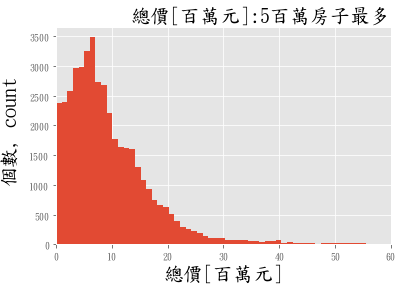

In [75]:
plt.hist(dfmo['總價[百萬元]'],bins)

plt.title("總價[百萬元]:5百萬房子最多",color='black',loc='right',size=20)
plt.xlabel('總價[百萬元]',size=20,color='black')
plt.ylabel('個數, count',color='black',size=20)
plt.xlim(0,60)

## 用 scatter plot  畫圖比較欄位之間的相關性

Text(0,0.5,'總價[百萬元]')

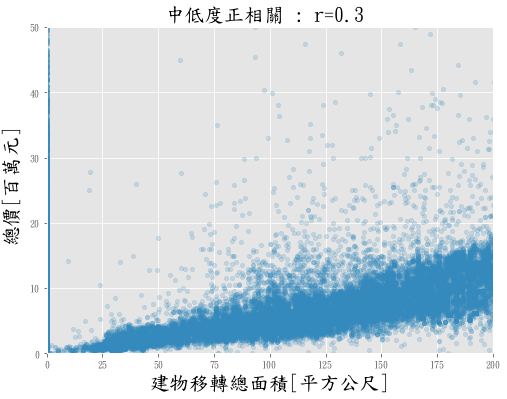

In [76]:
dfmo.plot(kind='scatter',x='建物移轉總面積[平方公尺]'  ,y='總價[百萬元]' , figsize=(8,6),alpha=0.2)
plt.xlim(0,200)
plt.ylim(0,50)
plt.title('中低度正相關 : r=0.3 ',color='black',size=20)
plt.xlabel('建物移轉總面積[平方公尺]',size=20,color='black')
plt.ylabel('總價[百萬元]',color='black',size=20)

Text(0,0.5,'現況格局-衛')

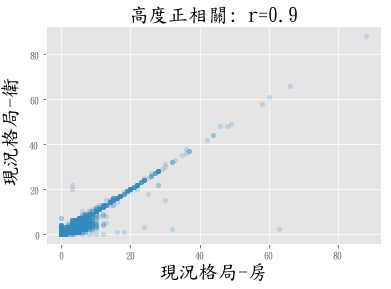

In [77]:
dfmo.plot(kind='scatter',x='現況格局-房'  ,y='現況格局-衛' , figsize=(6,4),alpha=0.2)
plt.title('高度正相關: r=0.9',color='black',size=20)
plt.xlabel('現況格局-房',size=20,color='black')
plt.ylabel('現況格局-衛',color='black',size=20)

(0, 500)

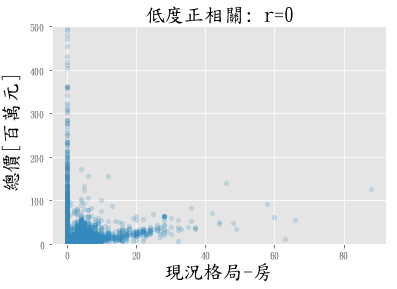

In [78]:
dfmo.plot(kind='scatter',x='現況格局-房'  ,y='總價[百萬元]' , figsize=(6,4),alpha=0.2)
plt.title('低度正相關: r=0',color='black',size=20)
plt.xlabel('現況格局-房',size=20,color='black')
plt.ylabel('總價[百萬元]',color='black',size=20)
plt.ylim(0,500)

## 取出欲做　correlation coefficient 的欄位

In [79]:
dfmo_conv=dfmo[["現況格局-房","建物移轉總面積[平方公尺]","現況格局-廳","現況格局-衛","總價[百萬元]"]]

In [80]:
dfmo_conv[:10]

,現況格局-房,建物移轉總面積[平方公尺],現況格局-廳,現況格局-衛,總價[百萬元]
0,3,114.860,1,1,8.500
1,3,75.900,2,1,5.408
2,0,0.000,0,0,13.770
3,1,103.851,1,1,6.900
4,1,28.392,0,1,0.520
5,4,110.400,2,1,5.428
6,1,65.804,1,1,5.300
7,1,65.804,1,1,5.630
8,1,88.335,1,1,6.550
9,4,72.000,1,2,5.100


In [81]:
corr_matrix=dfmo_conv.corr()

In [82]:
print(corr_matrix)

                 現況格局-房  建物移轉總面積[平方公尺]    現況格局-廳    現況格局-衛   總價[百萬元]
現況格局-房         1.000000       0.087764  0.527007  0.909033  0.036570
建物移轉總面積[平方公尺]  0.087764       1.000000  0.067843  0.079066  0.310652
現況格局-廳         0.527007       0.067843  1.000000  0.377910 -0.022321
現況格局-衛         0.909033       0.079066  0.377910  1.000000  0.047050
總價[百萬元]        0.036570       0.310652 -0.022321  0.047050  1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 27 columns):
P1LA_CF46         42881 non-null object
P1MA_CASEFLAG     43456 non-null object
P1MA_DD09         43456 non-null object
P1LA_CArea        43456 non-null float64
P1LA_C11_1        37214 non-null object
P1LA_C12_1        5986 non-null object
P1LA_C12_2        5794 non-null object
(沒有資料行名稱)         43456 non-null int64
(沒有資料行名稱)1        43456 non-null object
P1JD_14_1         36516 non-null object
P1LA_F13          37664 non-null object
P1MA_BUILD5       43456 non-null object
P1LA_F11          37566 non-null object
P1LA_F12          37659 non-null object
(沒有資料行名稱)2        35754 non-null float64
P1LA_FArea        43456 non-null float64
P1MA_BUILD1       35252 non-null object
P1MA_BUILD2       34042 non-null object
P1MA_BUILD3       35494 non-null object
P1MA_BUILD4       43456 non-null object
P1MA_MANAGE       43456 non-null object
P1MA_TOTPRICE     43456 non-null int64
MeanPrice   